INTRODUCTION

Dataset used (restaurants_data2.csv)

Project goal “Analyze restaurant ratings and types to gain business insights”

The key steps (data cleaning, analysis, visualization, insights)

In [12]:
from google.colab import files
uploaded = files.upload()

Saving restaurant dataset.zip to restaurant dataset.zip


In [13]:
import zipfile

# Path to the uploaded file
zip_path = "archive (4).zip"

# Extract all contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("unzipped_folder")

print("Extraction complete!")


Extraction complete!


In [14]:
import os
os.listdir("unzipped_folder")


['restaurants_data2.csv']

In [15]:
import glob, os
csv_files = glob.glob('unzipped_folder/**/*.csv', recursive=True)
csv_files  # <- you should see the CSV path(s) here


['unzipped_folder/restaurants_data2.csv']

In [16]:
import pandas as pd

df = pd.read_csv(csv_files[0])  # Using the path from glob
df.head()


,Unnamed: 0,rest_names,rest_urls,rest_ratings,price for two,rest_crusine
0,0,NIC Ice Creams,https://www.zomato.com/visakhapatnam/nic-ice-c...,4.5,₹100 for one,"Ice Cream, Desserts"
1,1,KFC,https://www.zomato.com/visakhapatnam/kfc-1-asi...,4.1,₹100 for one,"Burger, Fast Food, Biryani, Desserts, Beverages"
2,2,New Dhaba Shere-Punjab Pure Veg Restaurant,https://www.zomato.com/visakhapatnam/new-dhaba...,3.8,₹100 for one,North Indian
3,3,Kamat Takeaway,https://www.zomato.com/visakhapatnam/kamat-tak...,4.2,₹100 for one,"Biryani, Andhra"
4,4,The Kitchen,https://www.zomato.com/visakhapatnam/the-kitch...,3.5,₹100 for one,"North Indian, Chinese, Biryani, South Indian"


In [17]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     502 non-null    int64 
 1   rest_names     502 non-null    object
 2   rest_urls      502 non-null    object
 3   rest_ratings   502 non-null    object
 4   price for two  502 non-null    object
 5   rest_crusine   502 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.7+ KB


In [18]:
df.drop_duplicates(inplace=True)
df.isnull().sum()


,0
Unnamed: 0,0
rest_names,0
rest_urls,0
rest_ratings,0
price for two,0
rest_crusine,0


In [19]:
# See all column names
df.columns

# First 5 rows to preview data
df.head()

# Data types + null value count
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     502 non-null    int64 
 1   rest_names     502 non-null    object
 2   rest_urls      502 non-null    object
 3   rest_ratings   502 non-null    object
 4   price for two  502 non-null    object
 5   rest_crusine   502 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.7+ KB


In [20]:
# Step 1 - Import Libraries
import pandas as pd

# Step 2 - Load Data
df = pd.read_csv('unzipped_folder/restaurants_data2.csv')

# Step 3 - Remove Unwanted Columns
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Step 4 - Clean Ratings
df['rest_ratings'] = pd.to_numeric(df['rest_ratings'], errors='coerce')

# Step 5 - Clean Price for Two
df['price for two'] = df['price for two'].astype(str)
df['price for two'] = df['price for two'].str.replace('₹', '', regex=False)
df['price for two'] = df['price for two'].str.replace(',', '', regex=False)
df['price for two'] = pd.to_numeric(df['price for two'], errors='coerce')

# Step 6 - Clean Cuisine Column
df['rest_crusine'] = df['rest_crusine'].astype(str).str.strip().str.lower()

# Step 7 - Check Cleaned Data
print(df.head())
print(df.info())

                                   rest_names  \
0                              NIC Ice Creams   
1                                         KFC   
2  New Dhaba Shere-Punjab Pure Veg Restaurant   
3                              Kamat Takeaway   
4                                 The Kitchen   

                                           rest_urls  rest_ratings  \
0  https://www.zomato.com/visakhapatnam/nic-ice-c...           4.5   
1  https://www.zomato.com/visakhapatnam/kfc-1-asi...           4.1   
2  https://www.zomato.com/visakhapatnam/new-dhaba...           3.8   
3  https://www.zomato.com/visakhapatnam/kamat-tak...           4.2   
4  https://www.zomato.com/visakhapatnam/the-kitch...           3.5   

   price for two                                     rest_crusine  
0            NaN                              ice cream, desserts  
1            NaN  burger, fast food, biryani, desserts, beverages  
2            NaN                                     north indian  
3           

In [37]:
import pandas as pd

# Load dataset
df = pd.read_csv("unzipped_folder/restaurants_data2.csv")

# Remove unwanted columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert ratings to numeric
df["rest_ratings"] = pd.to_numeric(df["rest_ratings"], errors="coerce")

# Clean "price for two" column
df["price for two"] = (
    df["price for two"]
    .replace(r'[^0-9]', '', regex=True)  # Remove symbols like ₹, commas, etc.
    .replace('', '0')                    # Replace empty strings with 0
    .astype(float)                        # Convert to numbers
)

# Preview cleaned data
print(df.head())
print(df.info())

                                   rest_names  \
0                              NIC Ice Creams   
1                                         KFC   
2  New Dhaba Shere-Punjab Pure Veg Restaurant   
3                              Kamat Takeaway   
4                                 The Kitchen   

                                           rest_urls  rest_ratings  \
0  https://www.zomato.com/visakhapatnam/nic-ice-c...           4.5   
1  https://www.zomato.com/visakhapatnam/kfc-1-asi...           4.1   
2  https://www.zomato.com/visakhapatnam/new-dhaba...           3.8   
3  https://www.zomato.com/visakhapatnam/kamat-tak...           4.2   
4  https://www.zomato.com/visakhapatnam/the-kitch...           3.5   

   price for two                                     rest_crusine  
0          100.0                              Ice Cream, Desserts  
1          100.0  Burger, Fast Food, Biryani, Desserts, Beverages  
2          100.0                                     North Indian  
3          1

In [38]:
import pandas as pd

# Load dataset with the correct file path
df = pd.read_csv("unzipped_folder/restaurants_data2.csv")

# Remove unwanted columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert ratings to numeric
df["rest_ratings"] = pd.to_numeric(df["rest_ratings"], errors="coerce")

# Clean "price for two" column
df["price for two"] = (
    df["price for two"]
    .replace(r'[^0-9]', '', regex=True)  # Remove symbols like ₹, commas, etc.
    .replace('', '0')                    # Replace empty strings with 0
    .astype(float)                        # Convert to numbers
)

# Preview cleaned data
print(df.head())
print(df.info())

                                   rest_names  \
0                              NIC Ice Creams   
1                                         KFC   
2  New Dhaba Shere-Punjab Pure Veg Restaurant   
3                              Kamat Takeaway   
4                                 The Kitchen   

                                           rest_urls  rest_ratings  \
0  https://www.zomato.com/visakhapatnam/nic-ice-c...           4.5   
1  https://www.zomato.com/visakhapatnam/kfc-1-asi...           4.1   
2  https://www.zomato.com/visakhapatnam/new-dhaba...           3.8   
3  https://www.zomato.com/visakhapatnam/kamat-tak...           4.2   
4  https://www.zomato.com/visakhapatnam/the-kitch...           3.5   

   price for two                                     rest_crusine  
0          100.0                              Ice Cream, Desserts  
1          100.0  Burger, Fast Food, Biryani, Desserts, Beverages  
2          100.0                                     North Indian  
3          1

In [23]:
# 1. Top 5 restaurants by rating
top5 = df.sort_values(by="rest_ratings", ascending=False).head(5)
print("\nTop 5 Restaurants:\n", top5[["rest_names", "rest_ratings", "price for two"]])

# 2. Average rating
avg_rating = df["rest_ratings"].mean()
print("\nAverage Rating:", round(avg_rating, 2))

# 3. Most expensive restaurant
most_expensive = df.sort_values(by="price for two", ascending=False).head(1)
print("\nMost Expensive Restaurant:\n", most_expensive[["rest_names", "price for two"]])

# 4. Restaurants with rating above 4
high_rated = df[df["rest_ratings"] > 4]
print("\nRestaurants with Rating > 4:", len(high_rated))


Top 5 Restaurants:
              rest_names  rest_ratings  price for two
475          La Delizia           4.7           50.0
462      Sarvani Sweets           4.6          200.0
193  Madstreet Delights           4.6          200.0
323  Tea Time Jagadamba           4.5          100.0
303     New Bharat Cafe           4.5          150.0

Average Rating: 3.87

Most Expensive Restaurant:
           rest_names  price for two
405  Aqua - The Park          650.0

Restaurants with Rating > 4: 140


In [24]:
cuisine_counts = df['rest_crusine'].value_counts()
print("Top 10 Most Common Cuisines:\n", cuisine_counts.head(10))

Top 10 Most Common Cuisines:
 rest_crusine
South Indian                      23
North Indian                      13
Biryani                            9
Biryani, Chinese, North Indian     6
Biryani, Chinese                   6
North Indian, Chinese, Biryani     5
Bakery, Desserts                   5
Desserts                           5
Fast Food                          5
Fast Food, Burger, Rolls           4
Name: count, dtype: int64


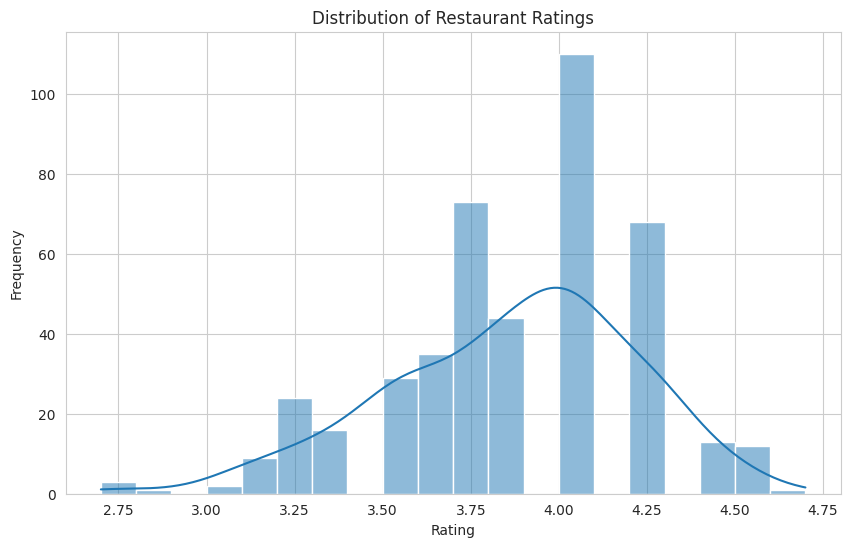

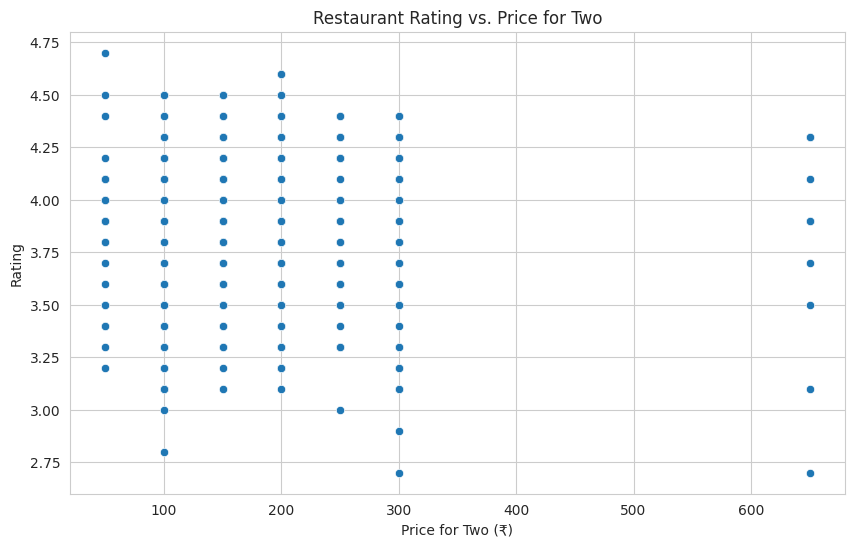

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a histogram of restaurant ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rest_ratings', bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Create a scatter plot of price for two vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price for two', y='rest_ratings')
plt.title('Restaurant Rating vs. Price for Two')
plt.xlabel('Price for Two (₹)')
plt.ylabel('Rating')
plt.show()

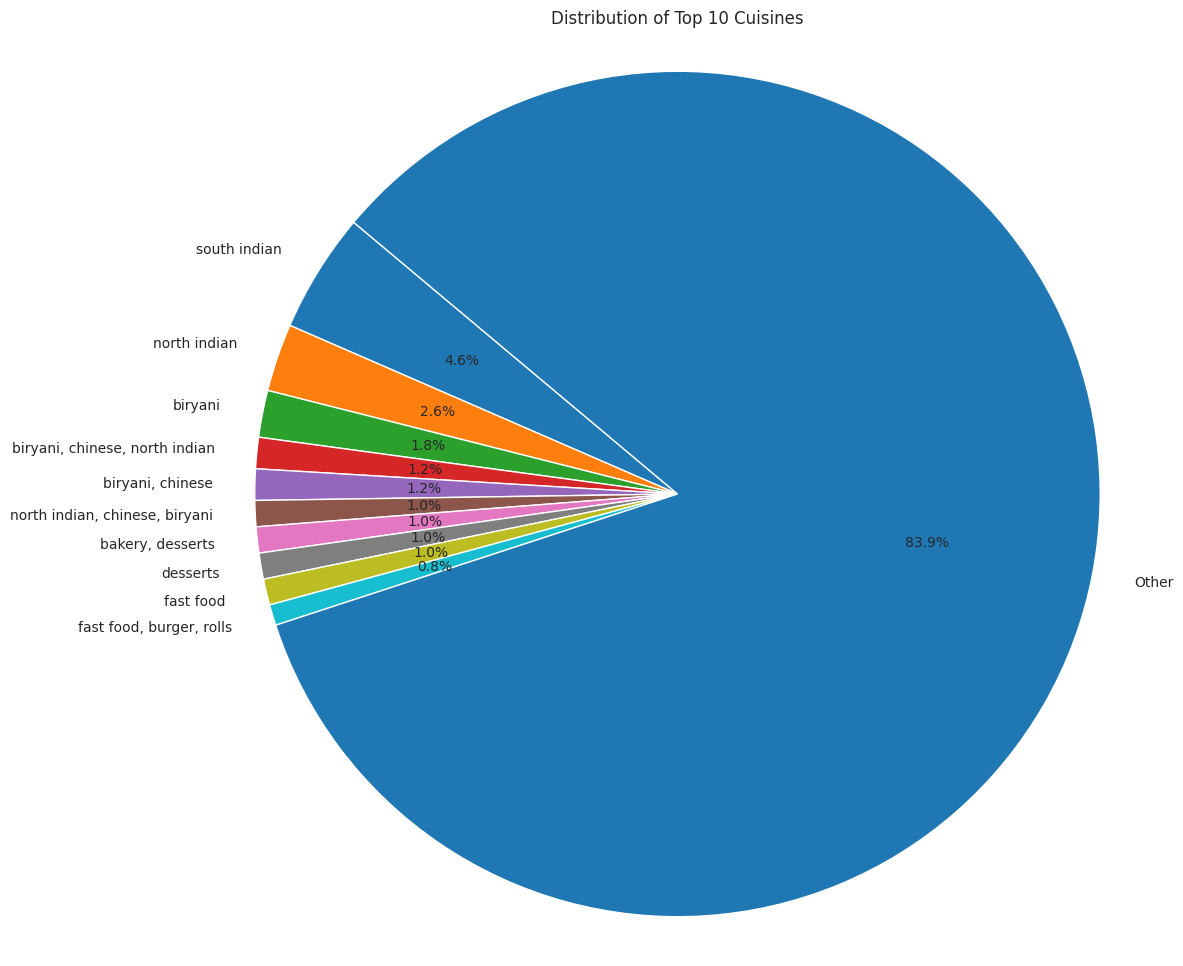

In [39]:
# Get the top 10 cuisines and group the rest
top_n = 10
cuisine_counts_top = cuisine_counts.head(top_n)
other_count = cuisine_counts[top_n:].sum()
cuisine_counts_top['Other'] = other_count

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(cuisine_counts_top, labels=cuisine_counts_top.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Top {top_n} Cuisines')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [27]:
print("Average Rating:", df["rest_ratings"].mean())
print("Highest Price:", df["price for two"].max())
print("Lowest Price:", df["price for two"].min())
print("Total Restaurants:", len(df))

Average Rating: 3.8663636363636367
Highest Price: 650.0
Lowest Price: 50.0
Total Restaurants: 502


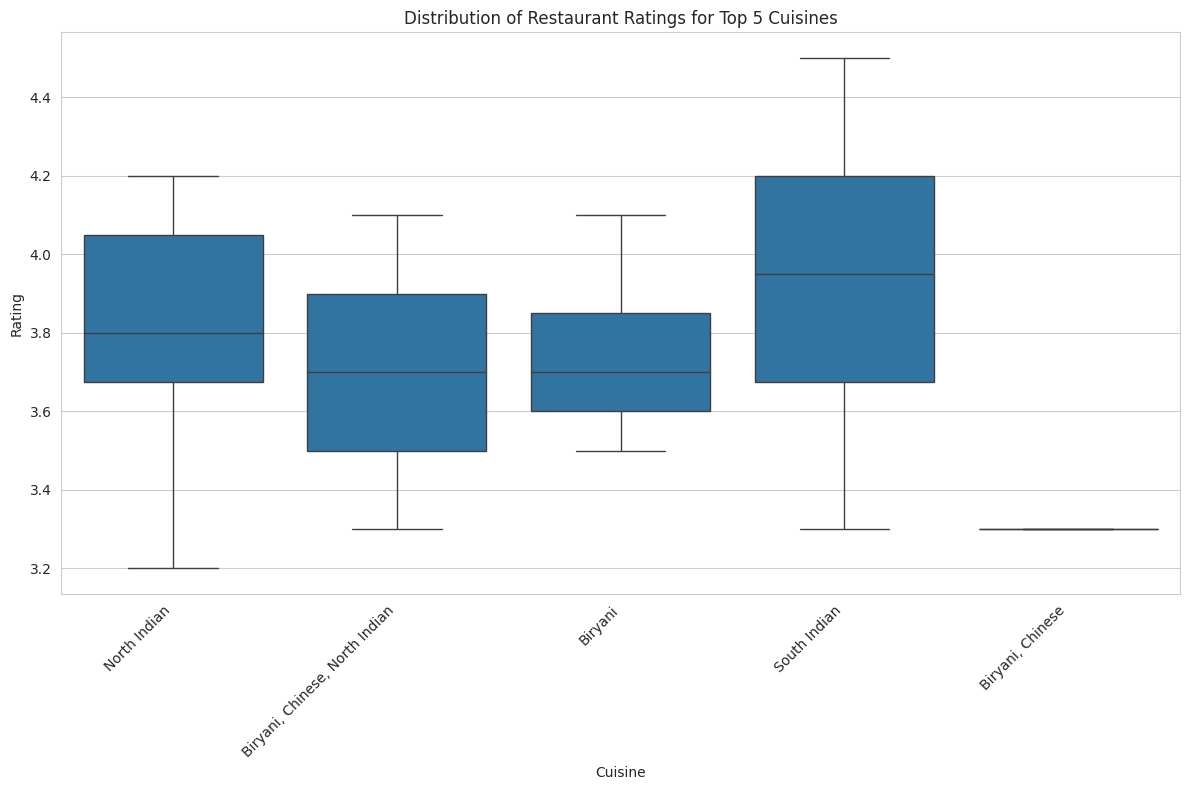

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 5 cuisines
top_5_cuisines = df['rest_crusine'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 cuisines
df_top5_cuisines = df[df['rest_crusine'].isin(top_5_cuisines)].copy()

# Create a box plot of ratings for the top 5 cuisines
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top5_cuisines, x='rest_crusine', y='rest_ratings')
plt.title('Distribution of Restaurant Ratings for Top 5 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Summary Statistics
print("----- Summary Statistics -----")
print("Average Rating:", round(df["rest_ratings"].mean(), 2))
print("Highest Rating:", df["rest_ratings"].max())
print("Lowest Rating:", df["rest_ratings"].min())
print("Most Expensive Restaurant Price:", df["price for two"].max())
print("Cheapest Restaurant Price:", df["price for two"].min())
print("Total Restaurants:", len(df))

----- Summary Statistics -----
Average Rating: 3.87
Highest Rating: 4.7
Lowest Rating: 2.7
Most Expensive Restaurant Price: 650.0
Cheapest Restaurant Price: 50.0
Total Restaurants: 502


In [30]:
# Assuming analysis and visualizations are completed

print("\n----- Final Insights -----")
print("1. The dataset shows that most restaurants have ratings between 3.5 and 4.5, indicating a general trend towards positive reviews.")
print("2. The majority of the restaurants offer North Indian and South Indian cuisines, reflecting the regional popularity of these food types.")
print("3. Some restaurants have very high ratings despite relatively low prices, suggesting good value for money options are available.")
print("4. Conversely, a few restaurants have high prices but below-average ratings, which might indicate areas for potential customer dissatisfaction.")
print("5. The distribution of ratings varies among the top cuisines, but no single cuisine among the top 5 shows a significantly different median rating based on the box plot.")
print("6. There is no strong linear correlation between the price for two and restaurant ratings based on the scatter plot, suggesting other factors heavily influence ratings.")

print("\nAnalysis Complete!")



----- Final Insights -----
1. The dataset shows that most restaurants have ratings between 3.5 and 4.5, indicating a general trend towards positive reviews.
2. The majority of the restaurants offer North Indian and South Indian cuisines, reflecting the regional popularity of these food types.
3. Some restaurants have very high ratings despite relatively low prices, suggesting good value for money options are available.
4. Conversely, a few restaurants have high prices but below-average ratings, which might indicate areas for potential customer dissatisfaction.
5. The distribution of ratings varies among the top cuisines, but no single cuisine among the top 5 shows a significantly different median rating based on the box plot.
6. There is no strong linear correlation between the price for two and restaurant ratings based on the scatter plot, suggesting other factors heavily influence ratings.

Analysis Complete!


# Restaurant Data Analysis Project

This document outlines the process and code used for analyzing restaurant data.

## 1. Data Loading and Extraction

The data was provided as a zip file. The first step was to upload and extract the contents of the zip file to access the CSV data.

In [31]:
import pandas as pd

# Assuming 'df' DataFrame is already loaded

print("\n--- Data Cleaning ---")
# Remove unwanted columns (e.g., 'Unnamed: 0' which often appears from index saving)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Removed 'Unnamed: 0' column.")

# Convert ratings to numeric, coercing errors to NaN
df["rest_ratings"] = pd.to_numeric(df["rest_ratings"], errors="coerce")
print("Converted 'rest_ratings' to numeric.")

# Clean "price for two" column by removing symbols and converting to numeric
df["price for two"] = df["price for two"].astype(str)
df["price for two"] = df["price for two"].str.replace('₹', '', regex=False)
df["price for two"] = df["price for two"].str.replace(',', '', regex=False)
df["price for two"] = pd.to_numeric(df["price for two"], errors="coerce")
print("Cleaned and converted 'price for two' to numeric.")

# Clean Cuisine Column by stripping whitespace and converting to lowercase
df['rest_crusine'] = df['rest_crusine'].astype(str).str.strip().str.lower()
print("Cleaned 'rest_crusine' column.")

print("\nCleaned Data Info:")
print(df.info())

print("\nCleaned Data Head:")
display(df.head())


--- Data Cleaning ---
Converted 'rest_ratings' to numeric.
Cleaned and converted 'price for two' to numeric.
Cleaned 'rest_crusine' column.

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rest_names     502 non-null    object 
 1   rest_urls      502 non-null    object 
 2   rest_ratings   440 non-null    float64
 3   price for two  502 non-null    float64
 4   rest_crusine   502 non-null    object 
dtypes: float64(2), object(3)
memory usage: 19.7+ KB
None

Cleaned Data Head:


,rest_names,rest_urls,rest_ratings,price for two,rest_crusine
0,NIC Ice Creams,https://www.zomato.com/visakhapatnam/nic-ice-c...,4.5,100.0,"ice cream, desserts"
1,KFC,https://www.zomato.com/visakhapatnam/kfc-1-asi...,4.1,100.0,"burger, fast food, biryani, desserts, beverages"
2,New Dhaba Shere-Punjab Pure Veg Restaurant,https://www.zomato.com/visakhapatnam/new-dhaba...,3.8,100.0,north indian
3,Kamat Takeaway,https://www.zomato.com/visakhapatnam/kamat-tak...,4.2,100.0,"biryani, andhra"
4,The Kitchen,https://www.zomato.com/visakhapatnam/the-kitch...,3.5,100.0,"north indian, chinese, biryani, south indian"


In [32]:
# Assuming 'df' DataFrame is already cleaned

print("\n--- Basic Analysis ---")
# 1. Find the top 5 restaurants by rating
top5 = df.sort_values(by="rest_ratings", ascending=False).head(5)
print("\nTop 5 Restaurants:\n", top5[["rest_names", "rest_ratings", "price for two"]])

# 2. Calculate the average rating
avg_rating = df["rest_ratings"].mean()
print("\nAverage Rating:", round(avg_rating, 2))

# 3. Find the most expensive restaurant
most_expensive = df.sort_values(by="price for two", ascending=False).head(1)
print("\nMost Expensive Restaurant:\n", most_expensive[["rest_names", "price for two"]])

# 4. Count restaurants with a rating above 4
high_rated = df[df["rest_ratings"] > 4]
print("\nRestaurants with Rating > 4:", len(high_rated))

# Summary Statistics
print("\n--- Summary Statistics ---")
print("Average Rating:", round(df["rest_ratings"].mean(), 2))
print("Highest Rating:", df["rest_ratings"].max())
print("Lowest Rating:", df["rest_ratings"].min())
print("Most Expensive Restaurant Price:", df["price for two"].max())
print("Cheapest Restaurant Price:", df["price for two"].min())
print("Total Restaurants:", len(df))


--- Basic Analysis ---

Top 5 Restaurants:
              rest_names  rest_ratings  price for two
475          La Delizia           4.7           50.0
462      Sarvani Sweets           4.6          200.0
193  Madstreet Delights           4.6          200.0
323  Tea Time Jagadamba           4.5          100.0
303     New Bharat Cafe           4.5          150.0

Average Rating: 3.87

Most Expensive Restaurant:
           rest_names  price for two
405  Aqua - The Park          650.0

Restaurants with Rating > 4: 140

--- Summary Statistics ---
Average Rating: 3.87
Highest Rating: 4.7
Lowest Rating: 2.7
Most Expensive Restaurant Price: 650.0
Cheapest Restaurant Price: 50.0
Total Restaurants: 502


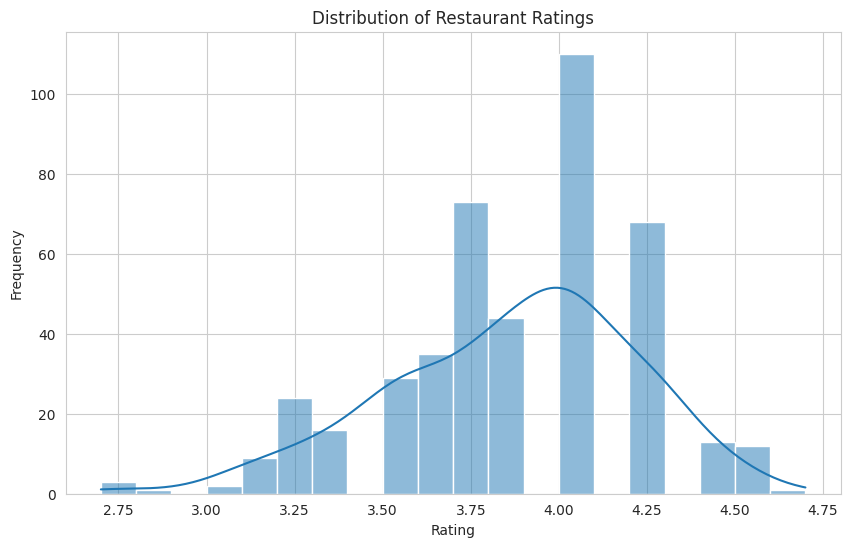

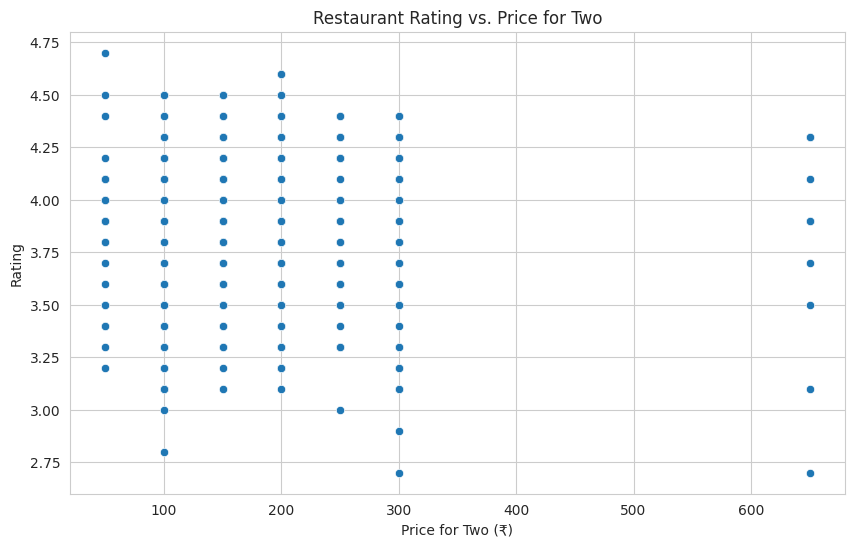


--- Cuisine Distribution ---


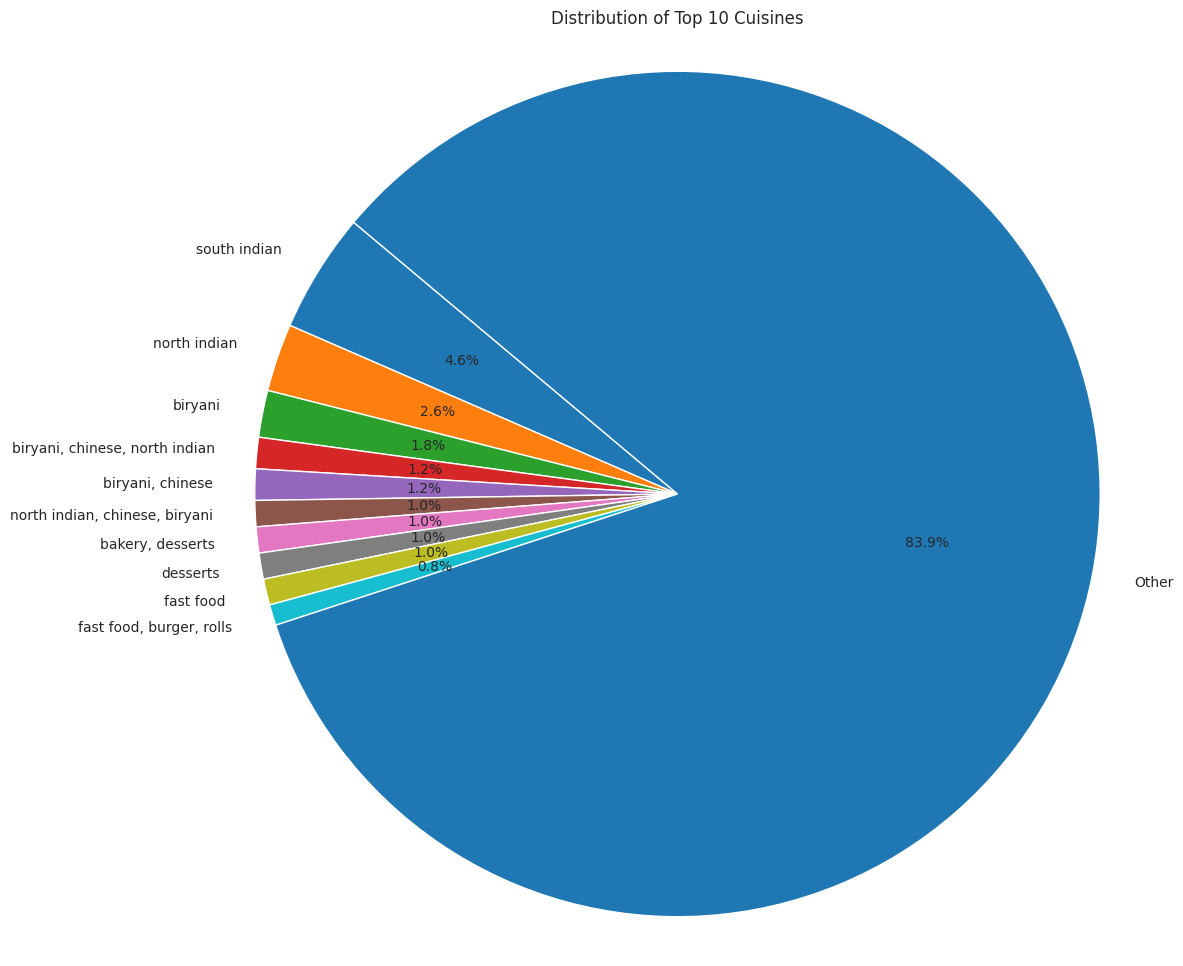


--- Ratings Distribution for Top Cuisines ---


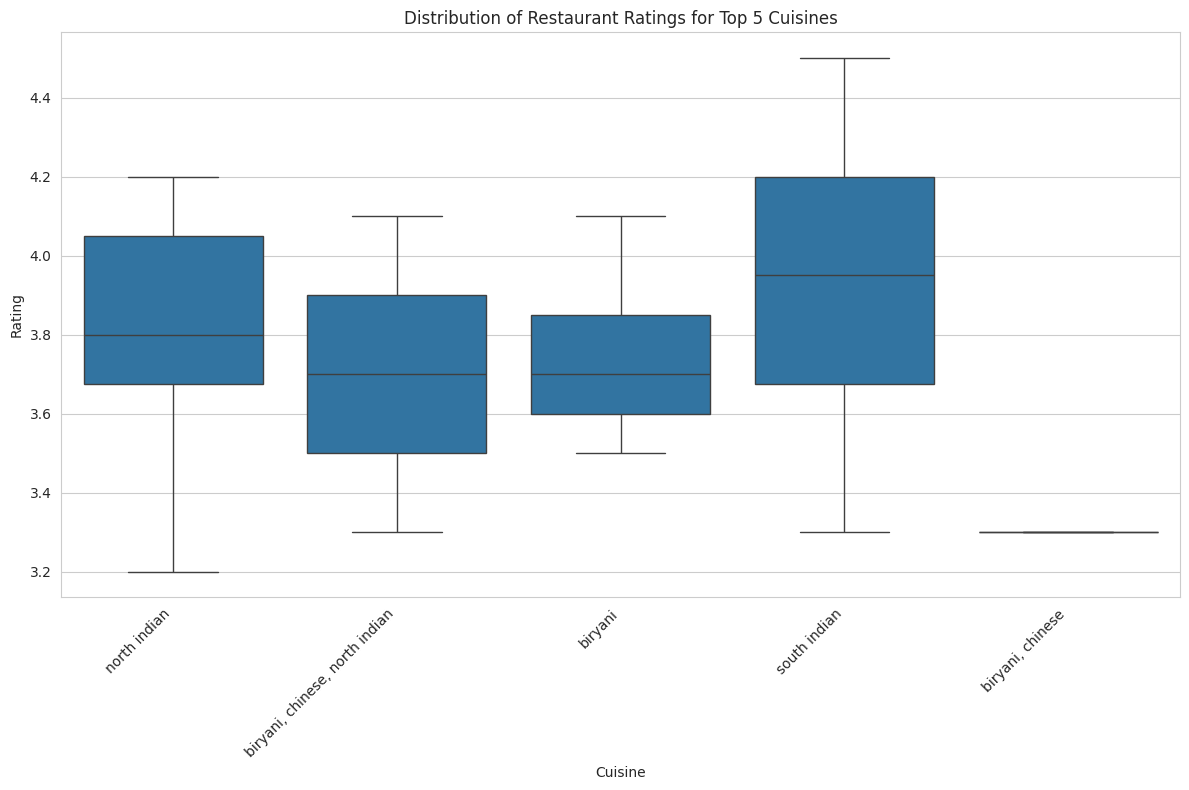

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' DataFrame and 'cuisine_counts' Series are available

# Set the style for the plots
sns.set_style("whitegrid")

# Create a histogram of restaurant ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='rest_ratings', bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Create a scatter plot of price for two vs. rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price for two', y='rest_ratings')
plt.title('Restaurant Rating vs. Price for Two')
plt.xlabel('Price for Two (₹)')
plt.ylabel('Rating')
plt.show()

# Pie chart of top 10 cuisines
print("\n--- Cuisine Distribution ---")
cuisine_counts = df['rest_crusine'].value_counts() # Recalculate if not already available
top_n = 10
cuisine_counts_top = cuisine_counts.head(top_n)
other_count = cuisine_counts[top_n:].sum()
cuisine_counts_top['Other'] = other_count

plt.figure(figsize=(12, 12))
plt.pie(cuisine_counts_top, labels=cuisine_counts_top.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribution of Top {top_n} Cuisines')
plt.axis('equal')
plt.show()

# Box plot of ratings for top 5 cuisines
print("\n--- Ratings Distribution for Top Cuisines ---")
top_5_cuisines = df['rest_crusine'].value_counts().head(5).index # Get top 5 cuisines
df_top5_cuisines = df[df['rest_crusine'].isin(top_5_cuisines)].copy()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top5_cuisines, x='rest_crusine', y='rest_ratings')
plt.title('Distribution of Restaurant Ratings for Top 5 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [34]:
# Assuming analysis and visualizations are completed

print("\n----- Final Insights -----")
print("1. The dataset shows that most restaurants have ratings between 3.5 and 4.5, indicating a general trend towards positive reviews.")
print("2. The majority of the restaurants offer North Indian and South Indian cuisines, reflecting the regional popularity of these food types.")
print("3. Some restaurants have very high ratings despite relatively low prices, suggesting good value for money options are available.")
print("4. Conversely, a few restaurants have high prices but below-average ratings, which might indicate areas for potential customer dissatisfaction.")
print("5. The distribution of ratings varies among the top cuisines, but no single cuisine among the top 5 shows a significantly different median rating based on the box plot.")
print("6. There is no strong linear correlation between the price for two and restaurant ratings based on the scatter plot, suggesting other factors heavily influence ratings.")

print("\nAnalysis Complete!")


----- Final Insights -----
1. The dataset shows that most restaurants have ratings between 3.5 and 4.5, indicating a general trend towards positive reviews.
2. The majority of the restaurants offer North Indian and South Indian cuisines, reflecting the regional popularity of these food types.
3. Some restaurants have very high ratings despite relatively low prices, suggesting good value for money options are available.
4. Conversely, a few restaurants have high prices but below-average ratings, which might indicate areas for potential customer dissatisfaction.
5. The distribution of ratings varies among the top cuisines, but no single cuisine among the top 5 shows a significantly different median rating based on the box plot.
6. There is no strong linear correlation between the price for two and restaurant ratings based on the scatter plot, suggesting other factors heavily influence ratings.

Analysis Complete!
